# Machine Learning Continues

## [Kaggle](https://www.kaggle.com/)

- [Competitions](https://www.kaggle.com/competitions)
- [Datasets](https://www.kaggle.com/datasets)
- [Getting Started](https://www.kaggle.com/competitions?sortBy=deadline&group=all&page=1&pageSize=20&segment=gettingStarted)

## Learning from Disaster: Titanic

- [Titanic tutorials](https://www.kaggle.com/c/titanic#tutorials)
- [Suggested tutorial](https://www.kaggle.com/startupsci/titanic-data-science-solutions) (this notebook is based on that tutorial)

## Understanding the problem

> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

### Research

> On April 15, 1912, [...], the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

### Questions

> Although there was some element of luck involved in surviving the sinking, which groups of people were more likely to survive than others?

---

> What type of Machine Learning problem are we facing?

---

> Would I survive the Titanic disaster?


# Show me the code

## Acquire data

In [1068]:
import pandas as pd

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
test_check_df = pd.read_csv('data/test-check.csv')

print('Train columns: ', train_df.columns.values, '\n')
print('Test columns: ', test_df.columns.values, '\n')
print('Test check columns: ', test_check_df.columns.values, '\n')

Train columns:  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked'] 

Test columns:  ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked'] 

Test check columns:  ['PassengerId' 'Survived'] 



In [1069]:
print('train_df.shape: ', train_df.shape)
print('test_df.shape: ', test_df.shape)
print('test_check_df.shape: ', test_check_df.shape)

train_df.shape:  (891, 12)
test_df.shape:  (418, 11)
test_check_df.shape:  (418, 2)


## Understanding the data

[![Link to data description](images/kaggle/titanic-data.png)](https://www.kaggle.com/c/titanic/data)

### First look

In [1070]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1071]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Questions

#### What data types are we facing? Which contains nulls?

In [1072]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Which features are categorical (nominal, ordinal, ratio, interval) and which are numerical (discrete, continuous, timeseries)?

- Categorical
  - Nominal
    - Survived
    - Sex
    - Embarked
  - Ordinal
    - Pclass
- Numerical
  - Continuous
    - Age
    - Fare
  - Discrete
    - SibSp
    - Parch

#### What's the data distribution?

In [1073]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1074]:
train_df[['Sex', 'Name', 'Embarked', 'Ticket', 'Cabin']].describe()

,Sex,Name,Embarked,Ticket,Cabin
count,891,891,889,891,204
unique,2,891,3,681,147
top,male,"McMahon, Mr. Martin",S,CA. 2343,C23 C25 C27
freq,577,1,644,7,4


## Analysing features

In [1075]:
train_df[train_df['Survived'] == 1]['Survived'].count() / train_df['Survived'].count()

0.38383838383838381

### Sex

In [1076]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Class (social economic status)

In [1077]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Sex and Class

In [1078]:
sex_and_class = train_df[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index=False).mean()
sex_and_class.sort_values(by='Survived', ascending=False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


### Embarked

<sub>C = Cherbourg, Q = Queenstown, S = Southampton</sub>


In [1079]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Sex, Class and Embarked

In [1080]:
sex_and_class = train_df[['Pclass', 'Sex', 'Embarked', 'Survived']].groupby(['Pclass', 'Sex', 'Embarked'], as_index=False).mean()
sex_and_class.sort_values(by='Survived', ascending=False)

,Pclass,Sex,Embarked,Survived
6,2,female,C,1.000000
7,2,female,Q,1.000000
1,1,female,Q,1.000000
0,1,female,C,0.976744
2,1,female,S,0.958333
8,2,female,S,0.910448
13,3,female,Q,0.727273
12,3,female,C,0.652174
3,1,male,C,0.404762
14,3,female,S,0.375000


### # of siblings and spouses

In [1081]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### # of parents and children

In [1082]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Age

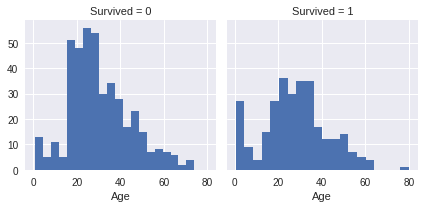

In [1083]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.FacetGrid(train_df, col='Survived').map(plt.hist, 'Age', bins=20)

### Age and Class

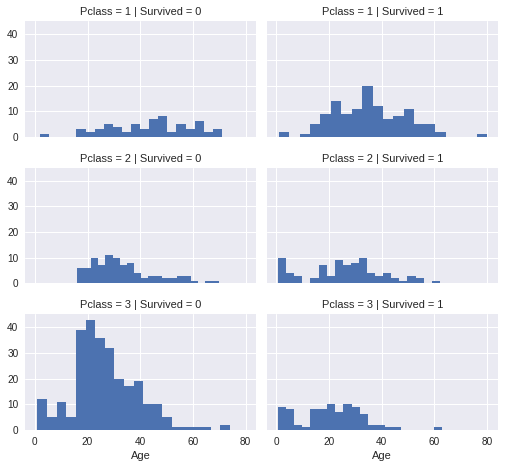

In [1084]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend();

### Age and Sex

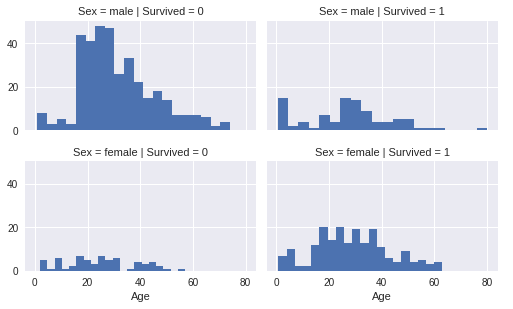

In [1085]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age',  bins=20)
grid.add_legend();

### Fare

In [1086]:
train_df[['Fare', 'Survived']].groupby(['Survived'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Survived,Fare
1,1,48.395408
0,0,22.117887


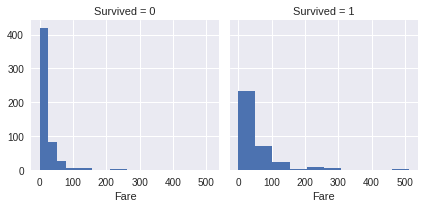

In [1087]:
sns.FacetGrid(train_df, col='Survived').map(plt.hist, 'Fare', bins=10)

### Fare x Class

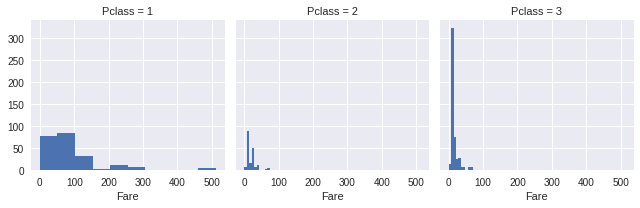

In [1088]:
sns.FacetGrid(train_df, col='Pclass').map(plt.hist, 'Fare', bins=10)

### Fare and Class

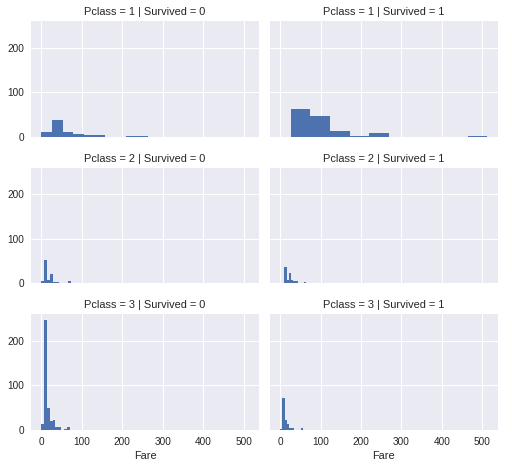

In [1089]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Fare', bins=10)
grid.add_legend();

### Fare x Sex

In [1090]:
train_df[['Fare', 'Sex']].groupby(['Sex'], as_index=False).mean().sort_values(by='Fare', ascending=False)

,Sex,Fare
0,female,44.479818
1,male,25.523893


### Fare and Sex

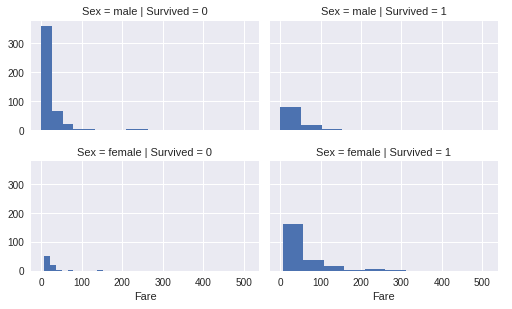

In [1091]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Fare',  bins=10)
grid.add_legend();

### Ticket

In [1092]:
ticket_df = train_df[['Ticket', 'PassengerId']].groupby(['Ticket']).count()
ticket_df[ticket_df['PassengerId'] > 1].describe()

,PassengerId
count,134.000000
mean,2.567164
std,1.106697
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,7.000000


### Cabin

In [1093]:
print(train_df[train_df['Cabin'].notnull()].Cabin.str.extract('^([A-Za-z])', expand=False).unique())
print(train_df[train_df['Cabin'].notnull()].Cabin.str.extract('^([A-Za-z])', expand=False).describe())

['C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
count     204
unique      8
top         C
freq       59
Name: Cabin, dtype: object


## Feature Engineering

### Dropping features

The PassengerId for some reason had a good correlation with Survived, but it's not clear that the it's not due to some kind of dataset sorting, hence we drop to avoid that possible ordering bias.




In [1094]:
train_df = train_df.drop(['PassengerId'], axis=1)
test_df = test_df.drop(['PassengerId'], axis=1)

In [1095]:
print('train_df: ', train_df.shape, train_df.columns.values)
print('test_df: ', test_df.shape, test_df.columns.values)

train_df:  (891, 11) ['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
test_df:  (418, 10) ['Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Cabin'
 'Embarked']


### Converting Sex

In [1096]:
train_df['Sex'] = train_df['Sex'].map({ 'female': 0, 'male': 1 }).astype(int)
test_df['Sex'] = test_df['Sex'].map({ 'female': 0, 'male': 1 }).astype(int)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### Filling null Ages

In [1097]:
mean_age = train_df['Age'].mean()
mean_age

29.69911764705882

In [1098]:
train_df['Age'] = train_df['Age'].fillna(mean_age)
test_df['Age'] = test_df['Age'].fillna(mean_age)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


### Converting Ages

In [1099]:
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",1,32,0,0,370376,7.75,NaN,Q


### Filling null Embarked

<sub>C = Cherbourg, Q = Queenstown, S = Southampton</sub>


In [1100]:
most_freq_port = train_df['Embarked'].describe().top
most_freq_port

'S'

In [1101]:
train_df['Embarked'] = train_df['Embarked'].fillna(most_freq_port)
test_df['Embarked'] = test_df['Embarked'].fillna(most_freq_port)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 76.6+ KB


### Extract Embarked dummy indicators

In [1102]:
test_df = pd.get_dummies(test_df, columns=['Embarked'])
train_df = pd.get_dummies(train_df, columns=['Embarked'])
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,1,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,0,0,1
4,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,0,0,1


### Combine siblings, spouses, parents, and children into FamilySize

In [1103]:
train_df['FamilySize'] = train_df['Parch'] + train_df['SibSp'] + 1
test_df['FamilySize'] = test_df['Parch'] + test_df['SibSp'] + 1
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,FamilySize
886,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.00,NaN,0,0,1,1
887,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.00,B42,0,0,1,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29,1,2,W./C. 6607,23.45,NaN,0,0,1,4
889,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.00,C148,1,0,0,1
890,0,3,"Dooley, Mr. Patrick",1,32,0,0,370376,7.75,NaN,0,1,0,1


### Analyse family size

In [1104]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


### Travelling alone

In [1105]:
train_df['TravellingAlone'] = 0
train_df.loc[train_df['FamilySize'] == 1, 'TravellingAlone'] = 1

test_df['TravellingAlone'] = 0
test_df.loc[test_df['FamilySize'] == 1, 'TravellingAlone'] = 1

train_df[['FamilySize', 'TravellingAlone']].head(5)

,FamilySize,TravellingAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


### Give weights for Fare

In [1106]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [1107]:
train_df.loc[train_df['Fare'] <= 7.9104, 'FareWeight'] = 1
train_df.loc[(train_df['Fare'] > 7.9104) & (train_df['Fare'] <= 14.4542), 'FareWeight'] = 2
train_df.loc[(train_df['Fare'] > 14.4542) & (train_df['Fare'] <= 31.0000), 'FareWeight'] = 4
train_df.loc[train_df['Fare'] > 31.000, 'FareWeight'] = 8
train_df['Fare'] = train_df['Fare'].astype(int)
train_df['FareWeight'] = train_df['FareWeight'].astype(int)

test_df['Fare'] = test_df['Fare'].fillna(32.204208)
test_df.loc[test_df['Fare'] <= 7.9104, 'FareWeight'] = 1
test_df.loc[(test_df['Fare'] > 7.9104) & (test_df['Fare'] <= 14.4542), 'FareWeight'] = 2
test_df.loc[(test_df['Fare'] > 14.4542) & (test_df['Fare'] <= 31.0000), 'FareWeight'] = 4
test_df.loc[test_df['Fare'] > 31.000, 'FareWeight'] = 8
test_df['Fare'] = test_df['Fare'].astype(int)
test_df['FareWeight'] = test_df['FareWeight'].astype(int)

test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,FamilySize,TravellingAlone,FareWeight
0,3,"Kelly, Mr. James",1,34,0,0,330911,7,NaN,0,1,0,1,1,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,363272,7,NaN,0,0,1,2,0,1
2,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9,NaN,0,1,0,1,1,2
3,3,"Wirz, Mr. Albert",1,27,0,0,315154,8,NaN,0,0,1,1,1,2
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,3101298,12,NaN,0,0,1,3,0,2


### Analyse Fare Weights

In [1108]:
train_df[['FareWeight', 'Survived']].groupby(['FareWeight'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FareWeight,Survived
3,8,0.581081
2,4,0.454955
1,2,0.303571
0,1,0.197309


### Transform ticket into ticket occurrences

In [1109]:
train_df['TicketOccurrences'] = 1
train_df['TicketOccurrences'] = train_df[['Ticket', 'TicketOccurrences']].groupby(['Ticket']).transform(lambda t: t.count())

test_df['TicketOccurrences'] = 1
test_df['TicketOccurrences'] = test_df[['Ticket', 'TicketOccurrences']].groupby(['Ticket']).transform(lambda t: t.count())

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

train_df.head(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,FamilySize,TravellingAlone,FareWeight,TicketOccurrences
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7,NaN,0,0,1,2,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71,C85,1,0,0,2,0,8,1
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7,NaN,0,0,1,1,1,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53,C123,0,0,1,2,0,8,2


### Analyse ticket occurrences

In [1110]:
train_df[['TicketOccurrences', 'Survived']].groupby(['TicketOccurrences'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,TicketOccurrences,Survived
2,3,0.698413
1,2,0.574468
3,4,0.500000
0,1,0.297989
6,7,0.238095
4,5,0.000000
5,6,0.000000


### Transform cabin into section dummies

In [1111]:
train_df['Section'] = train_df['Cabin'].transform(lambda c: c.str.extract('^([A-Za-z])', expand=False))
test_df['Section'] = test_df['Cabin'].transform(lambda c: c.str.extract('^([A-Za-z])', expand=False))

train_df['Section'] = train_df['Section'].fillna('Unknown')
test_df['Section'] = test_df['Section'].fillna('Unknown')

test_df = pd.get_dummies(test_df, columns=['Section'], sparse=True)
train_df = pd.get_dummies(train_df, columns=['Section'], sparse=True)

train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

train_df[['Section_A', 'Section_B', 'Section_C', 'Section_D', 'Section_E', 'Section_F', 'Section_G', 'Section_T', 'Section_Unknown']].head(5)

,Section_A,Section_B,Section_C,Section_D,Section_E,Section_F,Section_G,Section_T,Section_Unknown
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [1112]:
# guarantee that all columns will be present on test_df as well
if 'Section_A' not in test_df.columns:
    test_df['Section_A'] = 0
if 'Section_B' not in test_df.columns:
    test_df['Section_B'] = 0
if 'Section_C' not in test_df.columns:
    test_df['Section_C'] = 0
if 'Section_D' not in test_df.columns:
    test_df['Section_D'] = 0
if 'Section_E' not in test_df.columns:
    test_df['Section_E'] = 0
if 'Section_F' not in test_df.columns:
    test_df['Section_F'] = 0
if 'Section_G' not in test_df.columns:
    test_df['Section_G'] = 0
if 'Section_T' not in test_df.columns:
    test_df['Section_T'] = 0
if 'Section_Unknown' not in test_df.columns:
    test_df['Section_Unknown'] = 0


print(train_df.shape)
print(test_df.shape)

print(train_df.columns)
print(test_df.columns)

(891, 24)
(418, 23)
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize',
       'TravellingAlone', 'FareWeight', 'TicketOccurrences', 'Section_A',
       'Section_B', 'Section_C', 'Section_D', 'Section_E', 'Section_F',
       'Section_G', 'Section_T', 'Section_Unknown'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'FamilySize', 'TravellingAlone',
       'FareWeight', 'TicketOccurrences', 'Section_A', 'Section_B',
       'Section_C', 'Section_D', 'Section_E', 'Section_F', 'Section_G',
       'Section_Unknown', 'Section_T'],
      dtype='object')


### Analyse sections

In [1113]:
train_df[['Section_A', 'Section_B', 'Section_C', 'Section_D', 'Section_E', 'Section_F', 'Section_G', 'Section_T', 'Section_Unknown', 'Survived']].groupby(['Survived'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Survived,Section_A,Section_B,Section_C,Section_D,Section_E,Section_F,Section_G,Section_T,Section_Unknown
1,1,0.020468,0.102339,0.102339,0.073099,0.070175,0.023392,0.005848,0.000000,0.602339
0,0,0.014572,0.021858,0.043716,0.014572,0.014572,0.009107,0.003643,0.001821,0.876138


### Extract title from name

In [1114]:
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

train_df[['Title', 'Name']].head(5)

,Title,Name
0,Mr,"Braund, Mr. Owen Harris"
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss,"Heikkinen, Miss. Laina"
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr,"Allen, Mr. William Henry"


In [1115]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [1116]:
# synonyms
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')

test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')
test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')

train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady',
       'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'], dtype=object)

### Remove name

In [1117]:
train_df = train_df.drop('Name', axis=1)
test_df = test_df.drop('Name', axis=1)

print(train_df.shape)
print(test_df.shape)

print(train_df.columns)
print(test_df.columns)

(891, 24)
(418, 23)
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize',
       'TravellingAlone', 'FareWeight', 'TicketOccurrences', 'Section_A',
       'Section_B', 'Section_C', 'Section_D', 'Section_E', 'Section_F',
       'Section_G', 'Section_T', 'Section_Unknown', 'Title'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'FamilySize', 'TravellingAlone',
       'FareWeight', 'TicketOccurrences', 'Section_A', 'Section_B',
       'Section_C', 'Section_D', 'Section_E', 'Section_F', 'Section_G',
       'Section_Unknown', 'Section_T', 'Title'],
      dtype='object')


### Group titles

In [1118]:
pd.crosstab(train_df['Title'], train_df['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [1119]:
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess', 'Sir'], 'Noble')
train_df['Title'] = train_df['Title'].replace(['Capt', 'Col', 'Major'], 'Military')
train_df['Title'] = train_df['Title'].replace(['Don', 'Dona', 'Dr', 'Rev', 'Jonkheer', 'Dona'], 'Other')

test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess', 'Sir'], 'Noble')
test_df['Title'] = test_df['Title'].replace(['Capt', 'Col', 'Major'], 'Military')
test_df['Title'] = test_df['Title'].replace(['Don', 'Dona', 'Dr', 'Rev', 'Jonkheer', 'Dona'], 'Other')

pd.crosstab(train_df['Title'], train_df['Survived'])

Survived,0,1
Title,,
Master,17,23
Military,3,2
Miss,55,130
Mr,436,81
Mrs,26,100
Noble,0,3
Other,12,3


In [1120]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
5,Noble,1.000000
4,Mrs,0.793651
2,Miss,0.702703
0,Master,0.575000
1,Military,0.400000
6,Other,0.200000
3,Mr,0.156673


In [1121]:
title_mapping = { "Mr": 1, "Other": 2, "Military": 4, "Master": 6, "Miss": 7, "Mrs": 8, "Noble": 10 }

train_df['TitleWeight'] = train_df['Title'].map(title_mapping).fillna(0)
test_df['TitleWeight'] = test_df['Title'].map(title_mapping).fillna(0)

train_df['TitleWeight']

0      1
1      8
2      7
3      8
4      1
5      1
6      1
7      6
8      8
9      8
10     7
11     7
12     1
13     1
14     7
15     8
16     6
17     1
18     8
19     8
20     1
21     1
22     7
23     1
24     7
25     8
26     1
27     1
28     7
29     1
      ..
861    1
862    8
863    7
864    1
865    8
866    7
867    1
868    1
869    6
870    1
871    8
872    1
873    1
874    8
875    7
876    1
877    1
878    1
879    8
880    8
881    1
882    7
883    1
884    1
885    8
886    2
887    7
888    7
889    1
890    1
Name: TitleWeight, Length: 891, dtype: int64

### Remove title

In [1122]:
train_df = train_df.drop("Title", axis=1)
test_df = test_df.drop("Title", axis=1)

In [1123]:
print(train_df.shape)
print(test_df.shape)

print(train_df.columns)
print(test_df.columns)

(891, 24)
(418, 23)
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize',
       'TravellingAlone', 'FareWeight', 'TicketOccurrences', 'Section_A',
       'Section_B', 'Section_C', 'Section_D', 'Section_E', 'Section_F',
       'Section_G', 'Section_T', 'Section_Unknown', 'TitleWeight'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'FamilySize', 'TravellingAlone',
       'FareWeight', 'TicketOccurrences', 'Section_A', 'Section_B',
       'Section_C', 'Section_D', 'Section_E', 'Section_F', 'Section_G',
       'Section_Unknown', 'Section_T', 'TitleWeight'],
      dtype='object')


In [1124]:
train_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize',
       'TravellingAlone', 'FareWeight', 'TicketOccurrences']].head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,TravellingAlone,FareWeight,TicketOccurrences
0,0,3,1,22,1,0,7,0,0,1,2,0,1,1
1,1,1,0,38,1,0,71,1,0,0,2,0,8,1
2,1,3,0,26,0,0,7,0,0,1,1,1,2,1
3,1,1,0,35,1,0,53,0,0,1,2,0,8,2
4,0,3,1,35,0,0,8,0,0,1,1,1,2,1


In [1125]:
train_df[['Section_A',
       'Section_B', 'Section_C', 'Section_D', 'Section_E', 'Section_F',
       'Section_G', 'Section_T', 'Section_Unknown', 'TitleWeight']].head(5)

,Section_A,Section_B,Section_C,Section_D,Section_E,Section_F,Section_G,Section_T,Section_Unknown,TitleWeight
0,0,0,0,0,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,0,8
2,0,0,0,0,0,0,0,0,1,7
3,0,0,1,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,1,1


## Creating Models

### Preparing input data

In [1126]:
train_data = train_df.drop("Survived", axis=1)
train_label = train_df["Survived"]

test_data  = test_df.copy()

train_data.shape, train_label.shape, test_data.shape

((891, 23), (891,), (418, 23))

### Some possible algorithms

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- **Naive Bayes classifier**
- Decision Tree
- **Random Forrest**
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

### Gaussian Naive Bayes

In [1127]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(train_data, train_label)

gaussian.score(train_data, train_label)

0.78787878787878785

In [1128]:
gaussian.predict(test_data)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1129]:
gaussian.score(test_data, test_check_df.drop(['PassengerId'], axis=1))

0.62918660287081341

### Random Forest

In [1130]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_data, train_label)

random_forest.score(train_data, train_label)

0.97194163860830529

In [1131]:
random_forest.predict(test_data)[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [1067]:
random_forest.score(test_data, test_check_df.drop(['PassengerId'], axis=1))

0.87799043062200954

### Feature Selection

In [1132]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
rfe = RFE(estimator=SVR(kernel="linear"), n_features_to_select=10)
selector = rfe.fit(train_df.drop("Survived", axis=1), train_df["Survived"])
selector

RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
  n_features_to_select=10, step=1, verbose=0)

In [1133]:
train_df.drop("Survived", axis=1).columns[selector.support_]

Index(['Sex', 'SibSp', 'FamilySize', 'TravellingAlone', 'Section_C',
       'Section_D', 'Section_E', 'Section_F', 'Section_G', 'TitleWeight'],
      dtype='object')

### Rebuilding models after feature selection

In [1134]:
train_data = train_df[train_df.drop("Survived", axis=1).columns[selector.support_]]
train_label = train_df["Survived"]

test_data  = test_df[test_df.columns[selector.support_]].copy()

train_data.shape, train_label.shape, test_data.shape

((891, 10), (891,), (418, 10))

### Gaussian Naive Bayes

In [1135]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(train_data, train_label)

gaussian.score(train_data, train_label), gaussian.score(test_data, test_check_df.drop(['PassengerId'], axis=1))

(0.79461279461279466, 0.90909090909090906)

### Random Forest

In [1136]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_data, train_label)

random_forest.score(train_data, train_label), random_forest.score(test_data, test_check_df.drop(['PassengerId'], axis=1))

(0.84624017957351294, 0.93301435406698563)

## Operationalizing
Answering new input questions:
- Would I survive the Titanic disaster?


### Preparing the input data

In [1137]:
test_data.columns

Index(['Sex', 'SibSp', 'FamilySize', 'TravellingAlone', 'Section_C',
       'Section_D', 'Section_E', 'Section_F', 'Section_G', 'TitleWeight'],
      dtype='object')

In [1147]:
adriano_2006 = pd.DataFrame({
    'Sex': [1], # male
    'SibSp': [0], # alone
    'FamilySize': [1], # alone
    'TravellingAlone': [1], # alone
    'Section_C': [0], # unknown
    'Section_D': [0], # unknown
    'Section_E': [0], # unknown
    'Section_F': [0], # unknown
    'Section_G': [0], # unknown
    'TitleWeight': [6] # master
})
adriano_2006

,FamilySize,Section_C,Section_D,Section_E,Section_F,Section_G,Sex,SibSp,TitleWeight,TravellingAlone
0,1,0,0,0,0,0,1,0,6,1


In [1148]:
adriano_2018 = pd.DataFrame({
    'Sex': [1], # male
    'SibSp': [1], # married
    'FamilySize': [2], # married
    'TravellingAlone': [1], # married
    'Section_C': [1], # cabin on section c
    'Section_D': [0], # cabin on section c
    'Section_E': [0], # cabin on section c
    'Section_F': [0], # cabin on section c
    'Section_G': [0], # cabin on section c
    'TitleWeight': [1] # mr
})
adriano_2018

,FamilySize,Section_C,Section_D,Section_E,Section_F,Section_G,Sex,SibSp,TitleWeight,TravellingAlone
0,2,1,0,0,0,0,1,1,1,1


### Random Forest Prediction

In [1155]:
prediction = pd.DataFrame({
    '2006 Adriano': random_forest.predict(adriano_2006),
    '2018 Adriano': random_forest.predict(adriano_2018)
}, index=['Survived']).transpose()

prediction

,Survived
2006 Adriano,1
2018 Adriano,0


### Gaussian Naive Bayes prediction

In [1156]:
prediction = pd.DataFrame({
    '2006 Adriano': gaussian.predict(adriano_2006),
    '2018 Adriano': gaussian.predict(adriano_2018)
}, index=['Survived']).transpose()

prediction

,Survived
2006 Adriano,1
2018 Adriano,1


### Exporting

In [1157]:
prediction.to_csv('output/prediction.csv')